18.511 seconds elapsed.


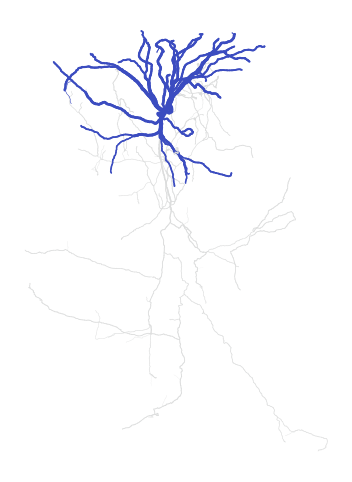

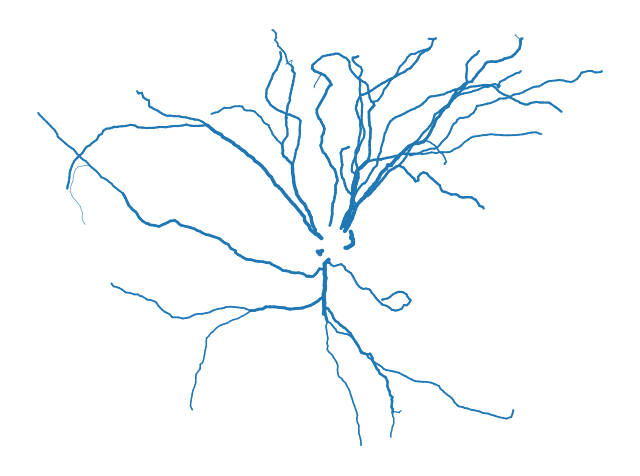

In [1]:
# %%
import time

import matplotlib.pyplot as plt
import numpy as np
import ossify
import pyvista as pv
from caveclient import CAVEclient

root_id = 864691135134585248

# %%
# 1. What is the synaptic density per unit length of dendrite for subclasses of VIP
# interneurons? How does this vary with distance from the soma?
#

client = CAVEclient("minnie65_phase3_v1")

# %%

currtime = time.time()

ts = client.chunkedgraph.get_root_timestamps([root_id], latest=True)[0]
cell = ossify.load_cell_from_client(
    root_id,
    client,
    synapses=True,
    restore_graph=False,
    restore_properties=True,
    synapse_spatial_point="ctr_pt_psition",
    timestamp=ts,
)
print(f"{time.time() - currtime:.3f} seconds elapsed.")

# %%

fig, ax = plt.subplots(figsize=(8, 6))
ossify.plot.plot_morphology_2d(
    cell,
    color="compartment",
    projection="xy",
    palette="coolwarm_r",
    ax=ax,
    linewidth="radius",
    linewidth_norm=(100, 500),  # Radius range for normalization
    widths=(0.05, 3),  # Final line width range
)
ax.axis("off")

# %%

# dendrite = cell.apply_mask()
skeleton_features = cell.skeleton.get_feature("compartment")
dendrite = cell.apply_mask("skeleton", skeleton_features == 3)
# %%

fig, ax = plt.subplots(figsize=(8, 6))
ossify.plot.plot_morphology_2d(
    dendrite,
    projection="xy",
    ax=ax,
    linewidth="radius",
    linewidth_norm=(100, 500),  # Radius range for normalization
    widths=(0.05, 3),  # Final line width range
)
ax.axis("off")

# %%


def edges_to_lines(edges):
    """Convert edges to pyvista lines format."""
    n_edges = edges.shape[0]
    lines = np.hstack(
        [np.full((n_edges, 1), 2), edges]
    )  # Each line has 2 points, so prepend with 2
    return lines.flatten()


# plotter = pv.Plotter()
# points = dendrite.skeleton.nodes[["x", "y", "z"]].to_numpy()
# edges = dendrite.skeleton.edges_positional
# lines = edges_to_lines(edges)
# skeleton = pv.PolyData(points, lines=lines)

# plotter.add_mesh(skeleton, color="black", line_width=2)

# plotter.show()

In [ ]:
dendrite.s.nodes.columns.difference(dendrite.s.spatial_columns).tolist()

(np.float64(658753.6),
 np.float64(975166.4),
 np.float64(582252.0),
 np.float64(845988.0))

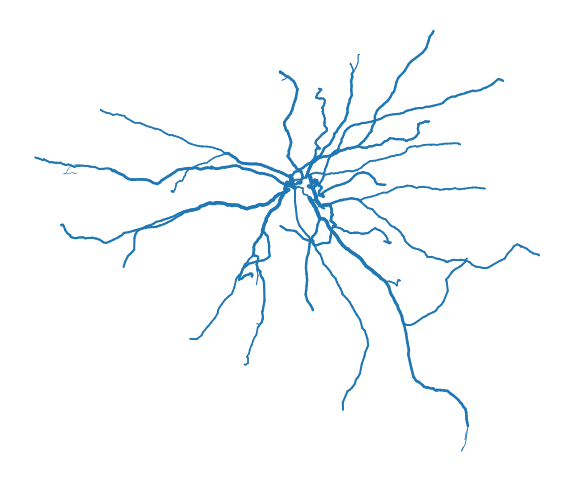

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))
ossify.plot.plot_morphology_2d(
    dendrite,
    projection="xz",
    ax=ax,
    linewidth="radius",
    linewidth_norm=(100, 500),  # Radius range for normalization
    widths=(0.05, 3),  # Final line width range
)
ax.axis("off")


In [ ]:
len(dendrite.s.cover_paths[0])

In [ ]:
dendrite.s.cover_paths_positional[0][103]

In [ ]:
dendrite.s.cover_paths[0][103]

In [ ]:
dendrite.s.parent_node_array[719]

In [ ]:
for c in dendrite.s.cover_paths:
# c = dendrite.s.cover_paths_positional[ii]
    if len(np.where(np.diff(dendrite.s.distance_to_root(c))>0)[0]>0):
        print("bad")

10.419 seconds elapsed.


AttributeError: 'Axes' object has no attribute 'set_xlimit'

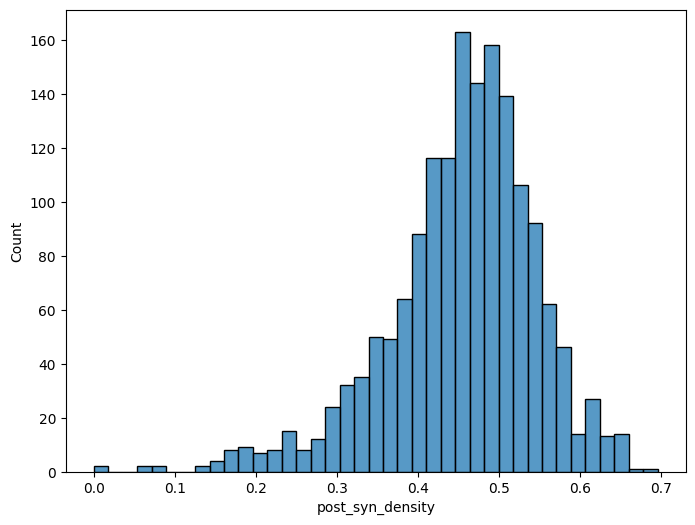

In [4]:
# %%
import time

import matplotlib.pyplot as plt
import numpy as np
import ossify
import pyvista as pv
import seaborn as sns
from caveclient import CAVEclient

root_id = 864691135134585248

# %%
# 1. What is the synaptic density per unit length of dendrite for subclasses of VIP
# interneurons? How does this vary with distance from the soma?
#

client = CAVEclient("minnie65_phase3_v1")

# %%

currtime = time.time()

ts = client.chunkedgraph.get_root_timestamps([root_id], latest=True)[0]
cell = ossify.load_cell_from_client(
    root_id,
    client,
    synapses=True,
    restore_graph=False,
    restore_properties=True,
    synapse_spatial_point="ctr_pt_psition",
    timestamp=ts,
)
print(f"{time.time() - currtime:.3f} seconds elapsed.")


# %%

# dendrite = cell.apply_mask()
skeleton_features = cell.skeleton.get_feature("compartment")
dendrite = cell.apply_mask("skeleton", skeleton_features == 3)

syn_density = (
    dendrite.skeleton.map_annotations_to_feature(
        "post_syn", distance_threshold=10000, agg="density", validate=True
    )
    * 1000
)
# sns.set_context("talk")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(syn_density, ax=ax)
ax.set_xlabel("Post-synaptic density (synapses/um)")

In [ ]:
agg_df = dendrite.skeleton._map_annotations_to_feature(
    "post_syn", distance_threshold=20000, agg="count", validate=True, compute_net_path=True, node_weight=dendrite.s.half_edge_length
)

In [ ]:
agg_df

In [ ]:
dendrite.s.half_edge_length

In [ ]:
prox_df

In [ ]:
agg_df

In [ ]:
syn_density

In [ ]:
syn_count = (
    dendrite.skeleton.map_annotations_to_feature(
        "post_syn", distance_threshold=20000, agg="count", validate=True
    )
)

In [ ]:
import pandas as pd

In [ ]:
pd.Series(
    data=dendrite.s.half_edge_length,
    index=dendrite.s.vertex_index,
    name='net_length',
)